* In clustering, I'm confused about whether I should choose one vector, eg, `lifeMale` 

* My average within-cluster sum of squares is definitely wrong. Not quite sure how to calculate this. Thought it was being output as `cluster.vq.kmeans(lifeMale, _)`

* I'm getting entirely different results for `cluster.vq.kmeans(lifeMale, 3)` vs `cluster.vq.kmeans([lifeMale], 3)` --> Note the parentheses. 

* I also don't understand how to get the color-coding for the three clusters illustrated in the lesson. 

* Note: This lesson feels short on examples

# Unit 4 Lesson 5 Project 3
### Estimated time 1 - 2 hours

In [1]:
from copy import copy
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import scipy

## Now we're going to apply K-Means clustering to a data set from the UN on economic and demographic data for different countries. We'll also use some well-known techniques to find the right K to use.

* Load the UN countries data set.

In [2]:
un = pd.read_csv('un.csv')

In [3]:
un.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Determine how many rows are in the dataset.

In [76]:
print(len(un))

207


* Determine the number of non-null values present in each column.

In [74]:
print(sorted([(col, len(copy(un[col]).dropna())) for col in un], key=lambda x: x[1], reverse=True))

[('country', 207), ('region', 207), ('infantMortality', 201), ('tfr', 197), ('GDPperCapita', 197), ('lifeMale', 196), ('lifeFemale', 196), ('economicActivityMale', 165), ('economicActivityFemale', 165), ('illiteracyMale', 160), ('illiteracyFemale', 160), ('contraception', 144), ('educationMale', 76), ('educationFemale', 76)]


* Based on the number of non-null values, which columns do you think will be the best to try to cluster on?

Those with more values / fewer missing values. See above. 

* Determine the data type of each column.

In [81]:
print([str(type(_)).split()[1][:-1] for _ in un.ix[0]])

["'str'", "'str'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'", "'numpy.float64'"]


* How many countries are present in the dataset?

207 (see above)

* We're going to see how `lifeMale`, `lifeFemale` and `infantMortality` cluster according to GDPperCapita, keeping in mind that we don't know in advance how many clusters there will be.

## Before we cluster the dataset, we need to determine the ideal number of clusters. For this, we need numpy and scipy.

* We're going to explore 1 to 10 clusters. Define a range K from 1 to 10.

In [82]:
K = range(1, 11)

* Apply `scipy.cluster.vq.kmeans` 1 to 10 and determine the cluster centroids.

In [83]:
from scipy import cluster

In [10]:
lifeMale = np.array(un["lifeMale"].dropna())

In [85]:
for _ in K:
    print(cluster.vq.kmeans(lifeMale, _))
    break

(array([[ 45. ,  68. ,  67.5,  44.9,  69.6,  67.2,  75.4,  73.7,  66.5,
         70.5,  71.1,  58.1,  73.6,  64.4,  73.9,  73.4,  52.4,  51.6,
         59.8,  70.5,  48.9,  63.4,  73.4,  67.8,  45.1,  45.5,  52.6,
         54.5,  76.1,  65.5,  46.4,  46.3,  72.3,  68.2,  68.2,  57. ,
         48.6,  67. ,  74.5,  68.1,  74.2,  75.4,  69.8,  51.3,  73. ,
         48.7,  68.9,  67.3,  64.7,  66.5,  48.4,  49.1,  63.9,  48.4,
         70.6,  73. ,  74.6,  69.8,  53.8,  45.4,  68.5,  73.4,  56.2,
         75.5,  72.1,  64.7,  46. ,  42.4,  61.1,  52.8,  67.5,  76.1,
         64.5,  77.4,  62.1,  63.3,  68.5,  60.9,  74. ,  75.7,  75.1,
         50. ,  72.4,  76.9,  67.7,  62.8,  52.3,  58. ,  68.9,  68.8,
         74.1,  63.4,  52. ,  62.5,  68.1,  57.3,  50. ,  63.9,  66.1,
         64.9,  73.1,  70.3,  57. ,  40.3,  69.9,  65.7,  46.4,  74.6,
         59.1,  73.7,  51.9,  68.3,  69.5,  64.4,  63.5,  64.3,  64.8,
         45.5,  58.5,  54.7,  57.6,  75. ,  73.4,  70.9,  74.7,  65.8,
     

* Calculate the distance between each point and each cluster centroid.

* Determine the closest centroid for each point.

* Calculate the average within-cluster sum of squares for each centroid.

## When we cluster, we are effectively trying to minimize the Euclidean distance between a cluster centroid and the points in that cluster. Practically, we define our clusters based on what will minimize what's called the within-cluster sum of squares (WCSS) (since sum of squares is the squared Euclidean distance).

* Plot the number of clusters against the average within-cluster sum of squares. At what number of clusters does the curve seem to "level out"?

Note: I don't know whether I should do this for one vector / feature or for more. When I do it for more (see below), I get nothing like the graph I'm getting for `lifeMale` alone.

In [88]:
lifeMale = un['lifeMale'].dropna()

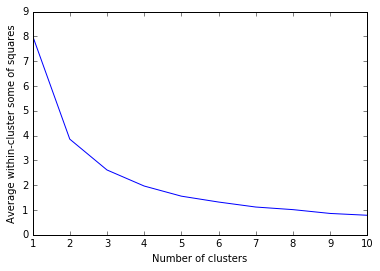

In [89]:
%matplotlib inline
plt.plot(range(1, 11), [cluster.vq.kmeans(lifeMale, _)[-1] for _ in r])
plt.ylabel('Average within-cluster some of squares')
plt.xlabel('Number of clusters')
plt.show()

In [90]:
un_clean = un.dropna()

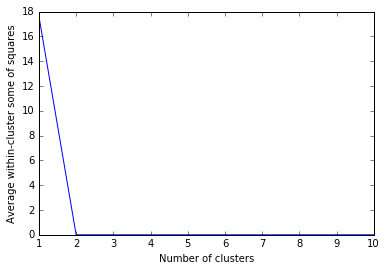

In [97]:
%matplotlib inline

plt.plot(range(1, 11), [cluster.vq.kmeans([un_clean['lifeMale'], un_clean['lifeFemale']], _)[-1] for _ in r])
plt.ylabel('Average within-cluster some of squares')
plt.xlabel('Number of clusters')
plt.show()

## Now we're going to the cluster the dataset. From the elbow plot we see that the largest drops in average within-cluster sum of squares occur from 1 to 2 and from 2 to 3 clusters. After that the drops are much smaller and decreasing. We pick 3 as the best number of clusters for this dataset.

* Cluster the UN dataset using k-means clustering with 3 clusters.

In [73]:
un.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [71]:
un_temp = un[['GDPperCapita', 'lifeMale']].dropna()
gdp = cluster.vq.kmeans([un_temp['GDPperCapita']], 3)[0]
lifeMale = cluster.vq.kmeans([un_temp['lifeMale']], 3)[0]



* Plot the results. What patterns stand out to you? What conclusions can you draw?

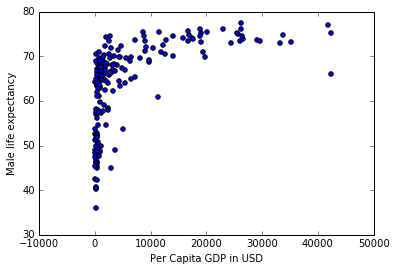

In [72]:
%matplotlib inline

plt.scatter(gdp, lifeMale)

plt.xlabel('Per Capita GDP in USD')
plt.ylabel('Male life expectancy')
plt.show()

I've not produced the other graphs becuase I doubt I'm doing this right. 

[Insert graph: Infant Mortality vs Per Capita GDP]

[Insert graph: Female Life Expectancy vs Per Capita GDP]